# Homework 1

In [67]:
!pip install -q interpret
!pip install -U kaleido
!pip install shap
!pip install dalex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Libs and data preparing

In [68]:
import os
import pandas as pd

In [69]:
maths = pd.read_csv('Maths.csv')
port = pd.read_csv('Portuguese.csv')

In [70]:
maths.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [71]:
port.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]

In [72]:
maths['isMath'] = 1
port['isMath'] = 0


In [73]:
df = pd.concat([maths, port], ignore_index=True)

In [74]:
df['isMath'].value_counts()

0    649
1    395
Name: isMath, dtype: int64

In [75]:
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences  G1  G2  G3 isMath  
0        3     4     1     1       3        6   5   6   6      1  
1        3     3     1     1       3        4   5   5   6      1  
2        3     2     2     3       3       10   7   8  10      1  
3        2     2     1     1       5        2  15  14  15      1  
4        3     2     1     2       5        4   6  10  10      1  

[5 rows x 34 columns]

In [76]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'isMath'],
      dtype='object')

In [77]:
import numpy as np
df.drop(['G1', 'G2'], inplace=True, axis=1)
df = pd.get_dummies(df, drop_first=True)
random_permutation = np.random.permutation(df.index)
X_train = df.loc[random_permutation[:int(len(df)*0.8)]]
X_test = df.loc[random_permutation[int(len(df)*0.8):]]

y_train = X_train[['G3']]
y_test = X_test[['G3']]

X_train = X_train.drop(['G3'], axis=1)
X_test = X_test.drop(['G3'], axis=1)

In [78]:
len(X_train.columns)

40

## Data Overview

### Features

In [79]:
# Histograms
import plotly.express as px

In [80]:
fig = px.histogram(df, x="G3", color="isMath", marginal="box", hover_data=df.columns)
fig.write_image('distribution.png')
fig.show(renderer="colab")

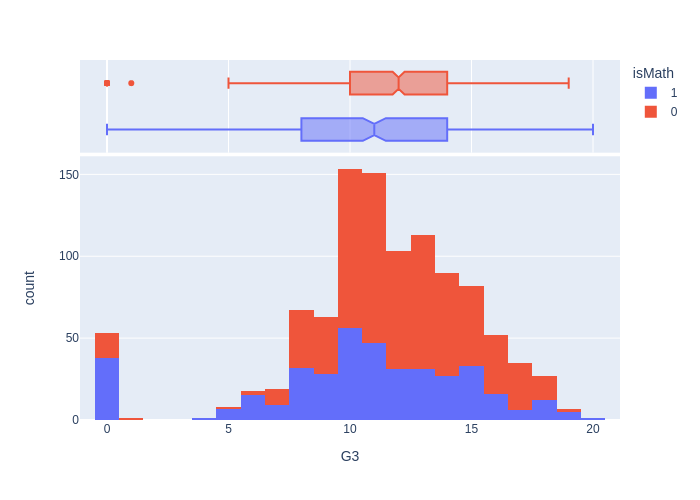

Firstly we made plots of the distributions over our target variable. We see that we have kind of class imbalance in this dataset since there is lack of 1-4 and 19+ classes. Also number of 5,6,7 is very small. This can indicate future problems with classification. For now, we don't transform our target variable, however in future it would be needed to dig deeper into drivers of grades so that better feature engineering might be constructed.

In [81]:
df_tmp = df[['famsize_LE3', 'studytime', 'freetime', 'health', 'G3', 'isMath']]
df_tmp['G3_LE10'] = df['G3'] <= 10
df_tmp.drop(['G3'], inplace=True, axis=1)
fig = px.parallel_categories(df_tmp, color="isMath", color_continuous_scale=px.colors.sequential.Inferno)
fig.write_image('parallel.png')
fig.show()

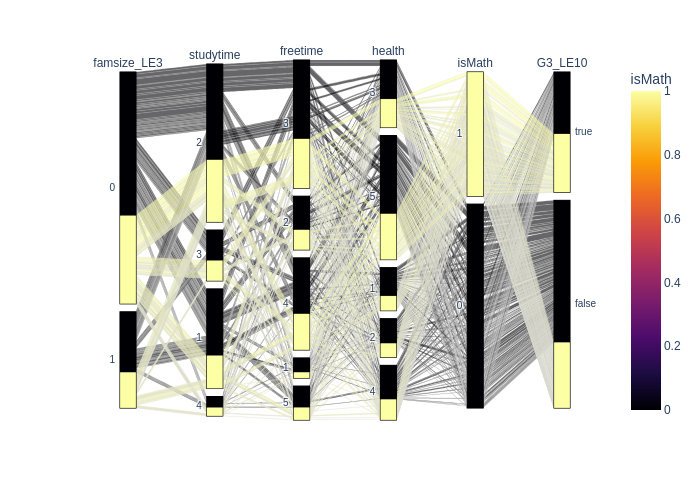

Here we see interesting plot of parallel categories. Firstly we split our target variable into 2 sets, those with values less/equal than 10 and those with higher. From that perspective we could conclude that there is imbalance of G3 across classes.

## Train Models

In [82]:
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

random_state = 42
ebm_search = [{}, {'learning_rate': 0.1, 'learning_rate': 0.001}]
lr_search = [{}]
xgb_search = [{}]

ebm_best = None
lr_best = None
xgb_best = None

ebm_best_score = 0
lr_best_score = 0
xgb_best_score = 0

param_search = {'EBM': ebm_search, 'RF': lr_search, 'XGB': xgb_search}
models = {'EBM': ExplainableBoostingClassifier, 'RF': LogisticRegression, 'XGB': XGBClassifier}
best_ckpts = {'EBM': ebm_best, 'RF': lr_best, 'XGB': xgb_best}
best_scores = {'EBM': ebm_best_score, 'RF': lr_best_score, 'XGB': xgb_best_score}

In [83]:
fn = lambda val: float(val)

In [84]:
y_train.value_counts()

G3
10    118
11    117
13     88
12     82
14     77
15     71
8      58
9      48
16     44
0      39
17     32
18     19
7      14
6      14
5       6
19      6
1       1
20      1
dtype: int64

## Selecting best model

In [85]:
for model_name in param_search.keys():
  print('Model name', model_name)  
  for params in param_search[model_name]:
    model = models[model_name](random_state=random_state, **params)
    if model_name == 'EBM':
      model.fit(X_train, y_train)
    else:
      model.fit(X_train, y_train.apply(float, axis=1))
    score = model.score(X_test, y_test)
    if score > best_scores[model_name] or best_ckpts[model_name] is None:
        best_ckpts[model_name] = model
        best_scores[model_name] = score

Model name EBM


Multiclass is still experimental. Subject to change per release.
Detected multiclass problem: forcing interactions to 0
Multiclass is still experimental. Subject to change per release.
Detected multiclass problem: forcing interactions to 0


Model name RF


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Model name XGB


In [86]:
results = pd.DataFrame({'Model': ['EBM', 'RF', 'XGB'], 'Score': [best_scores['EBM'], best_scores['RF'], best_scores['XGB']]})
results

Model     Score
0   EBM  0.244019
1    RF  0.239234
2   XGB  0.186603

Final results looks like follow.

EBM reference: https://interpret.ml/docs/ebm.html

# Homework 2

For the selected models, prepare a knitr/jupyter notebook based on the following points (you can use models created in Homework 1). Submit your results on GitHub to the directory Homeworks/HW2.

Train a tree-based ensemble model on the selected dataset; it can be one of random forest, GBM, CatBoost, XGBoost, LightGBM (various types) etc.

Select two observations from the dataset and calculate the model's prediction.
Next, for the same observations, calculate the decomposition of predictions, so-called variable attributions, using SHAP from two packages of choice, e.g. for Python: dalex and shap, for R: DALEX and iml.

Find any two observations in the dataset, such that they have different variables of the highest importance, e.g. age and gender have the highest (absolute) attribution for observation A, but race and class are more important for observation B.

(If possible) Select one variable X and find two observations in the dataset such that for one observation, X has a positive attribution, and for the other observation, X has a negative attribution.
(How) Do the results differ across the two packages selected in point (3)?

(Using one explanation package of choice) Train another model of any class: neural network, linear model, decision tree etc. and find an observation for which SHAP attributions are different between this model and the one trained in point (1).

Comment on the results obtained in points (4)-(7)

## A1 Train a tree-based ensemble model on the selected dataset; it can be one of random forest, GBM, CatBoost, XGBoost, LightGBM (various types) etc.

Training already done in previous homework

## A2 Select two observations from the dataset and calculate the model's prediction.

In [87]:
import shap

chosen_indices = list(range(10))
model = best_ckpts['RF']
test_subset, label = X_test.iloc[chosen_indices], y_test.iloc[chosen_indices]
preds = model.predict_proba(test_subset) 

preds

array([[3.55984982e-17, 7.53556609e-07, 1.98320086e-03, 4.78554686e-03,
        1.74389642e-03, 1.41808225e-01, 3.50221591e-02, 2.66045639e-01,
        1.22098280e-01, 2.17886806e-01, 1.67405602e-02, 6.42374591e-02,
        7.04529392e-02, 1.97225053e-02, 2.77193403e-02, 8.53048681e-03,
        8.64483982e-04, 3.57717457e-04],
       [6.20070456e-05, 5.63245281e-04, 3.93144141e-03, 1.60463312e-02,
        2.96199229e-03, 5.20546710e-02, 1.59939488e-02, 1.84530299e-01,
        2.63065101e-01, 1.04558577e-01, 2.34234036e-01, 7.04711840e-02,
        2.35309221e-02, 1.42277657e-02, 1.01535086e-02, 3.47802762e-03,
        3.55419499e-05, 1.01400295e-04],
       [8.66069182e-04, 1.41694934e-04, 3.98722117e-03, 2.86808849e-03,
        4.71091714e-02, 3.78978572e-01, 1.23669340e-01, 2.54760306e-01,
        1.03226140e-01, 5.27657899e-02, 5.35083850e-03, 5.91650788e-03,
        9.58147671e-03, 3.49213953e-03, 1.65227314e-03, 5.52891436e-03,
        6.23599307e-05, 4.30963131e-05],
       [8.554

In [88]:
label

G3
803  12
777  11
961   9
7     6
834  16
870  14
18    5
16   14
736  13
719  11

# A3

In [95]:
import dalex as dx
pf = lambda m, d: m.predict_proba(d)
explainer = dx.Explainer(model, X_train, y_train, model_type='classification')

for i in range(len(test_subset)):
    explainer.predict_parts(test_subset.iloc[i], type="shap", label=f'example {i}').plot()

Preparation of a new explainer is initiated

  -> data              : 835 rows 40 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 835 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7f6d4db56b90> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 4.62e-25, mean = 0.000439, max = 0.0364
  -> model type        : classification will be used
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.00436, mean = 11.5, max = 20.0
  -> model_info        : package sklearn

A new explainer has been created!


X does not have valid feature names, but LogisticRegression was fitted with feature names


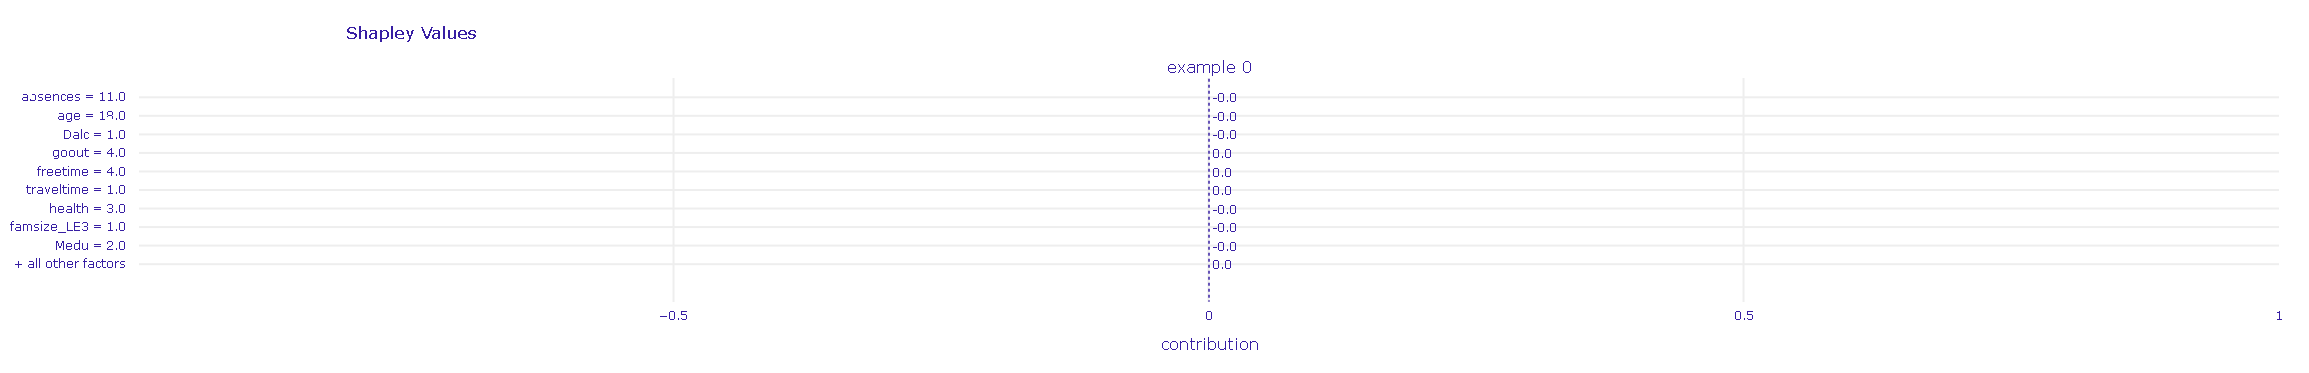

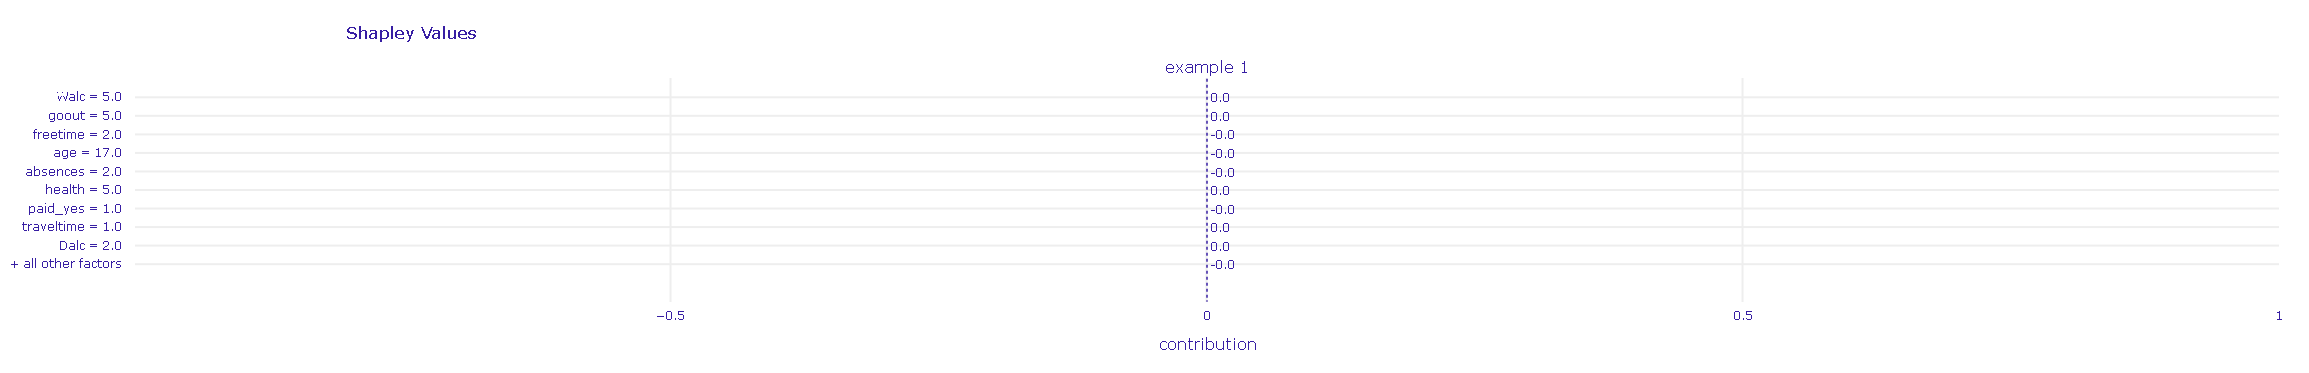

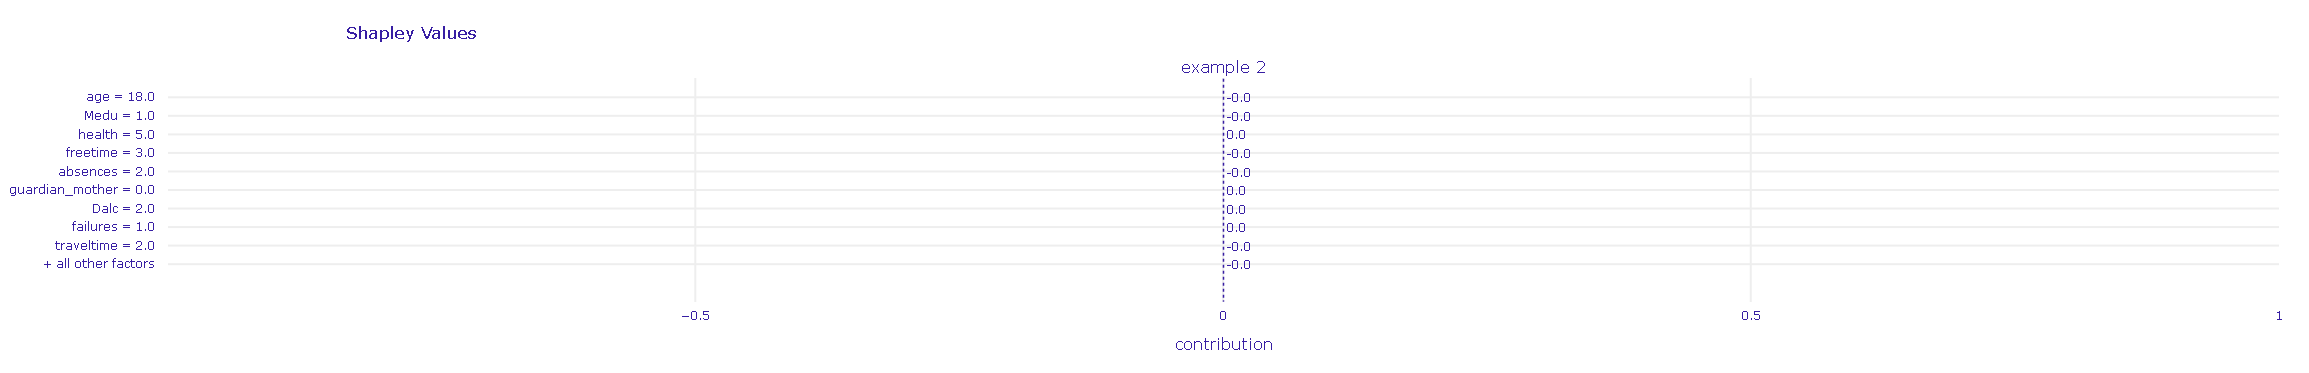

0


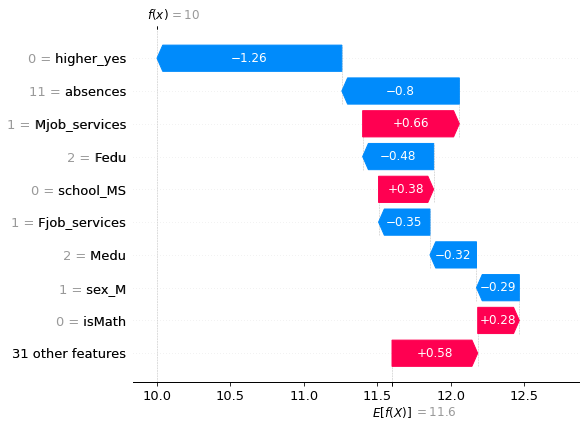

1


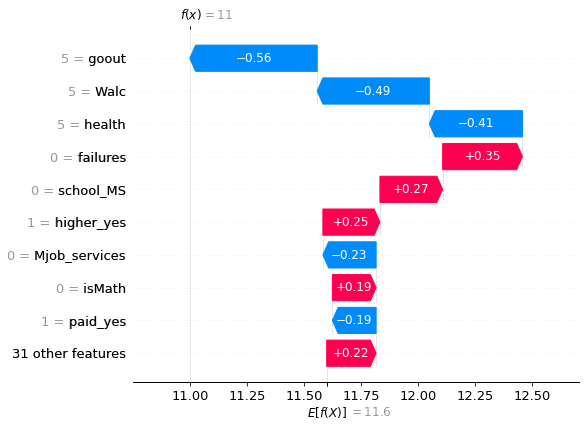

2


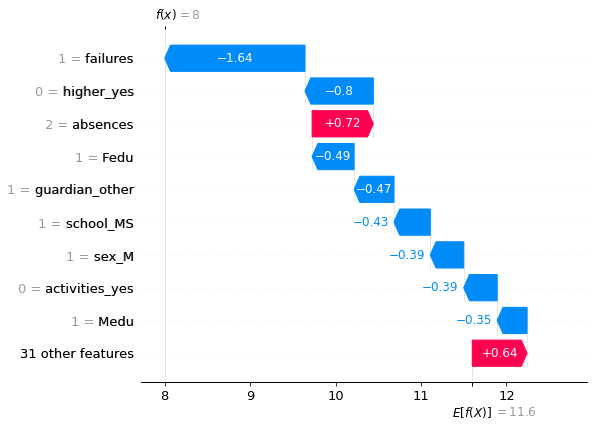

3


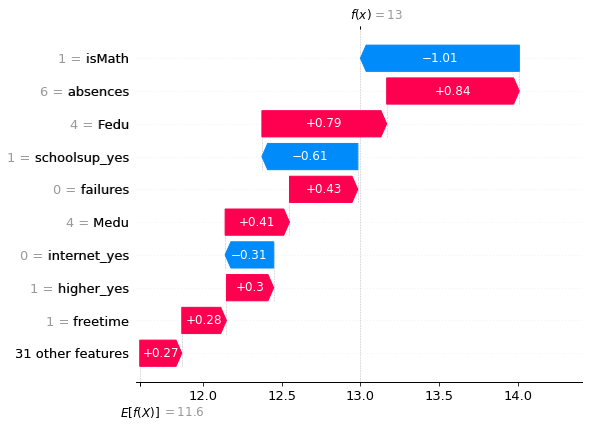

4


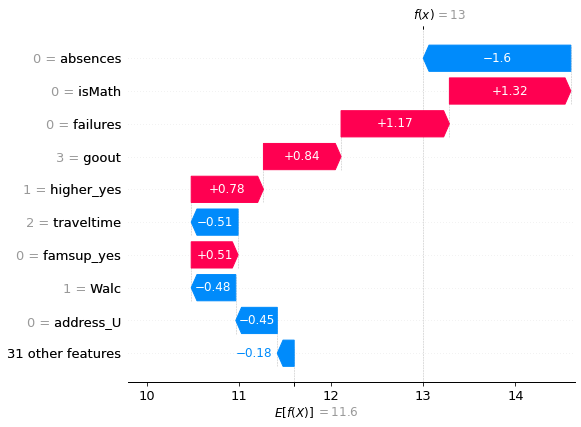

5


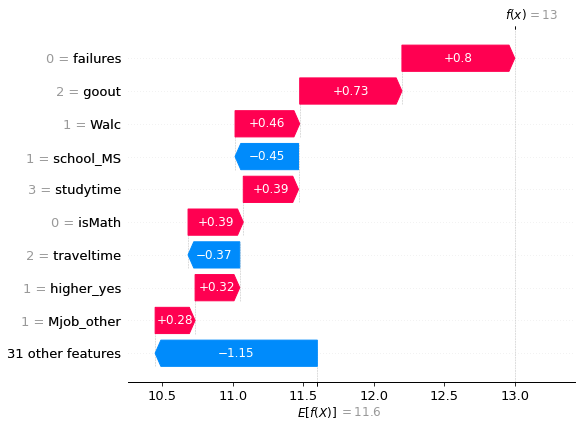

6


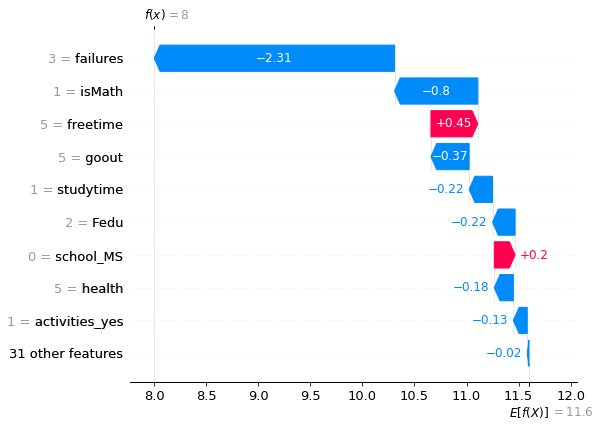

7


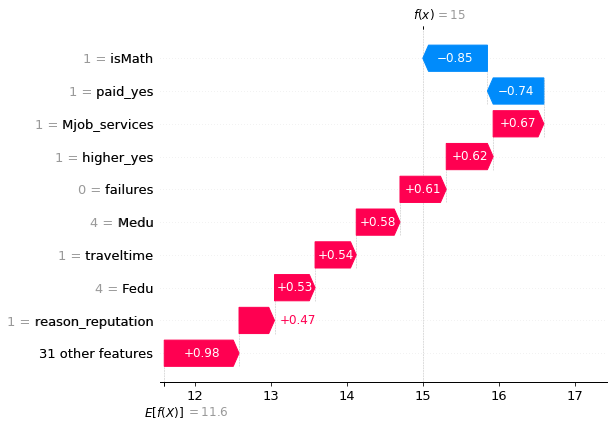

8


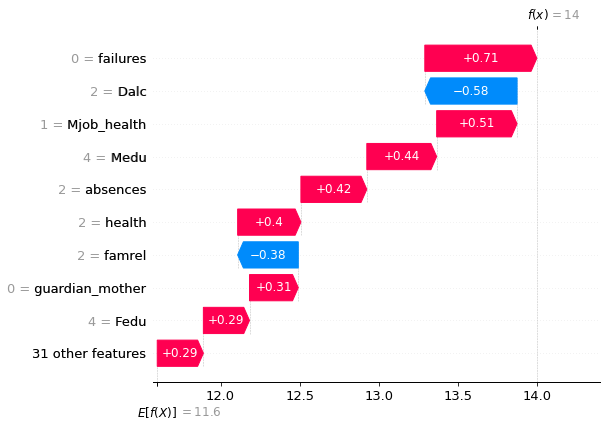

9


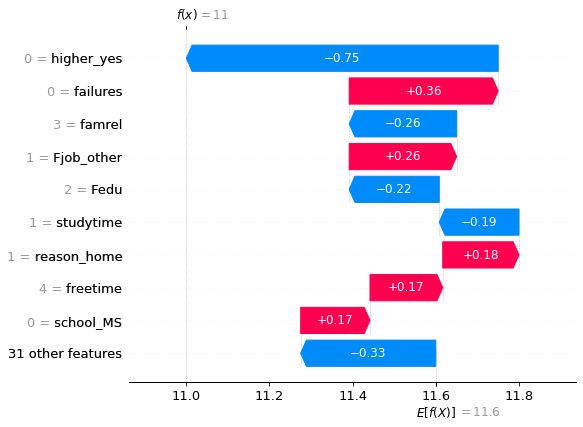

In [96]:
shap_explainer = shap.Explainer(model.predict, test_subset)
shap_values = shap_explainer(test_subset)

for i, v in enumerate(shap_values):
    print(i)
    shap.plots.waterfall(v)

## A.4. Find any two observations in the dataset, such that they have different variables of the highest importance, e.g. age and gender have the highest (absolute) attribution for observation A, but race and class are more important for observation B.

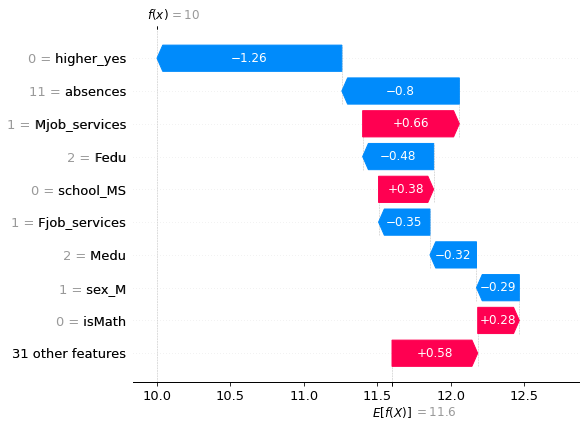

In [97]:
shap.plots.waterfall(shap_values[0])

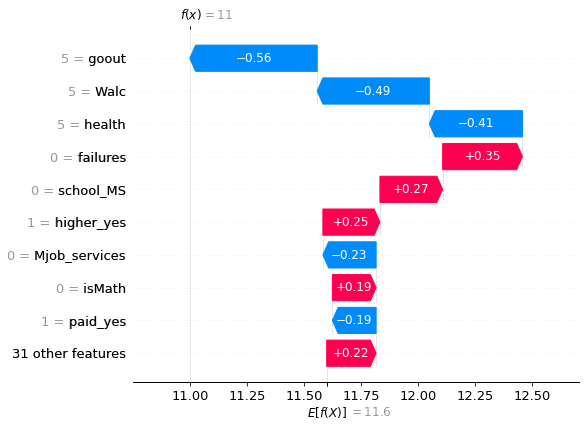

In [98]:
shap.plots.waterfall(shap_values[1])

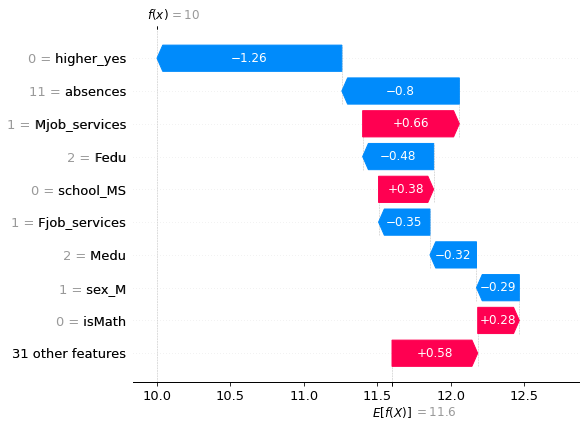

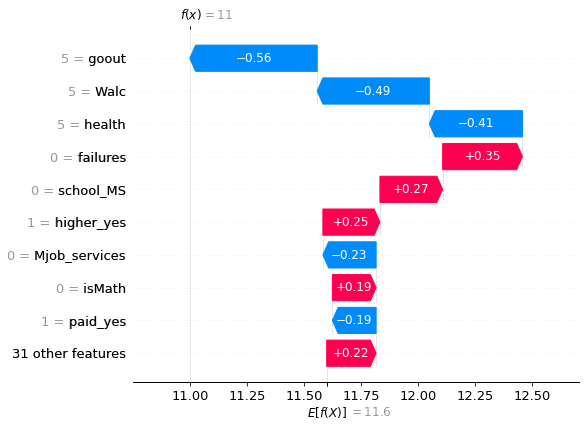

We see that for those two different entries from test dataset, top most feature pairs are different. In the first case both higher flag and absences contribut very much with negative score, while in the second case the most important factors for target grade are goout and walc

## A.5. Select one variable X and find two observations in the dataset such that for one observation, X has a positive attribution, and for the other observation, X has a negative attribution.

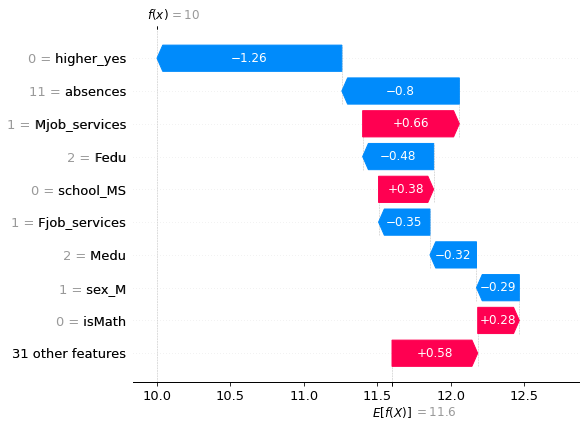

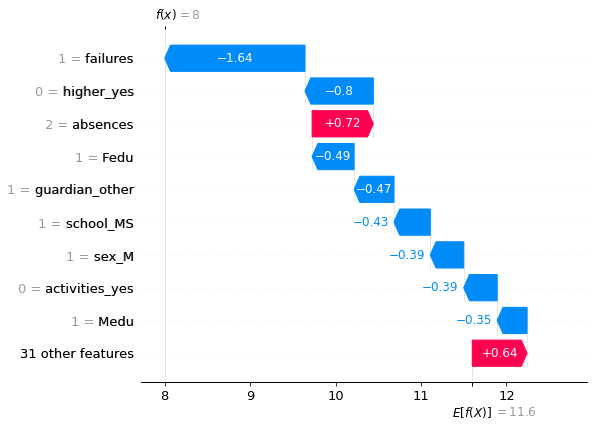

On the example above (0 vs 2 id from test set) we see that for one datapoint we have a featuee - absences - which contributes negatively, while for second it contributes negatively. It is because set of rest features differs from each other so that they are in different place in space. 

## A.6 (How) Do the results differ across the two packages selected in point (3)?


I've run training many times and it seems that on half cases Dalex plots very nice explanations of contributions, while for others not. It can suggests that for this particular problem, explaining methods are nor very stable.

## A.7. (Using one explanation package of choice) Train another model of any class: neural network, linear model, decision tree etc. and find an observation for which SHAP attributions are different between this model and the one trained in point (1).

0


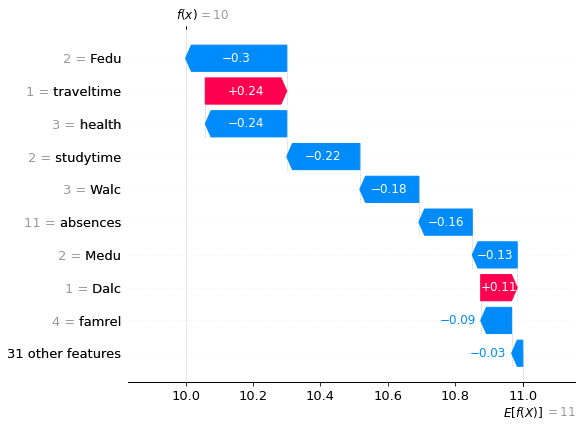

1


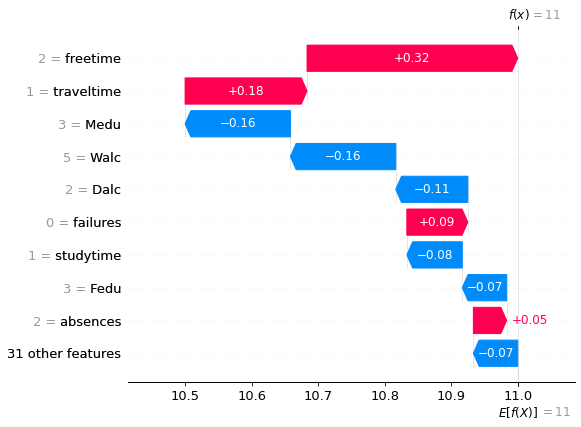

2


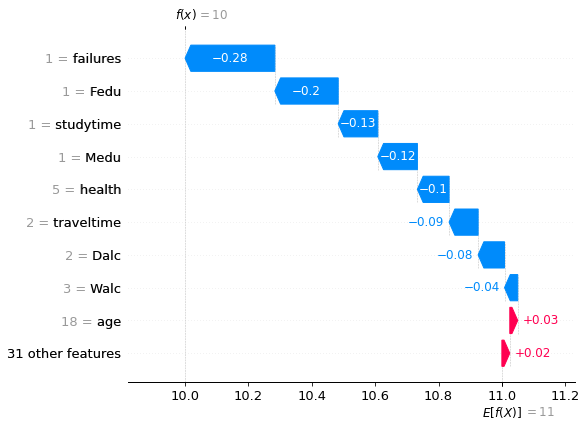

3


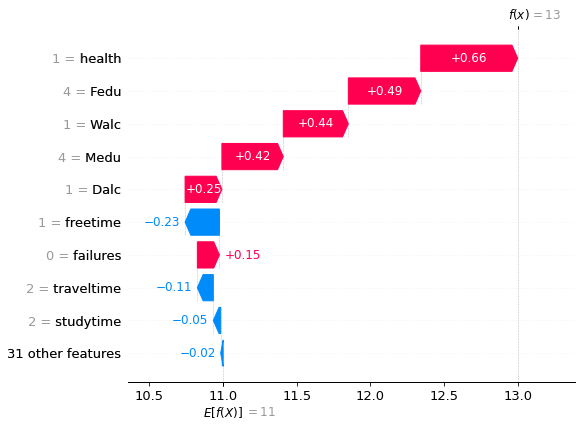

4


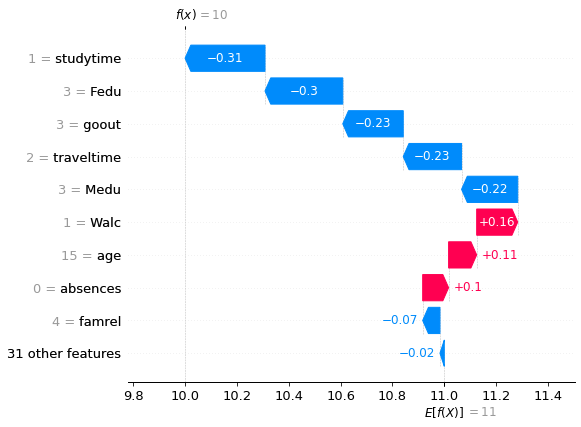

5


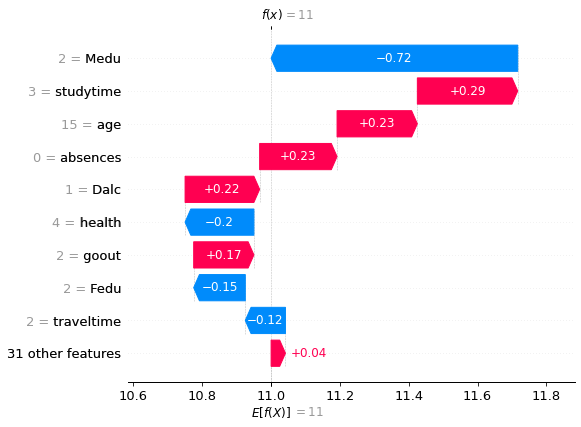

6


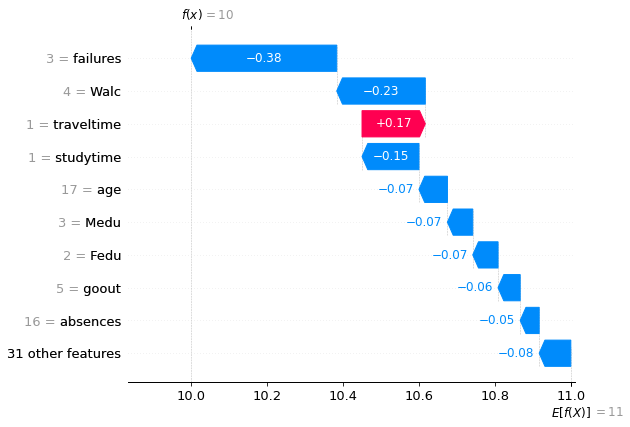

7


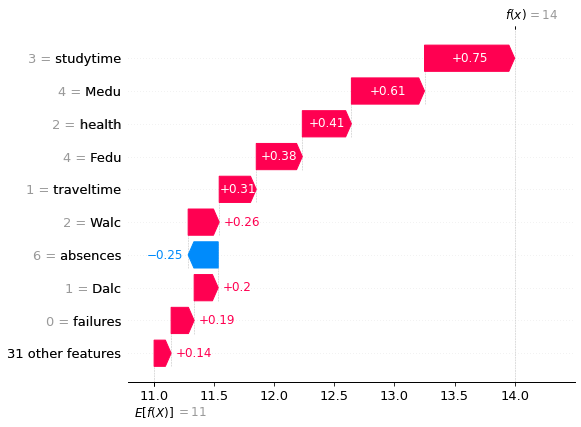

8


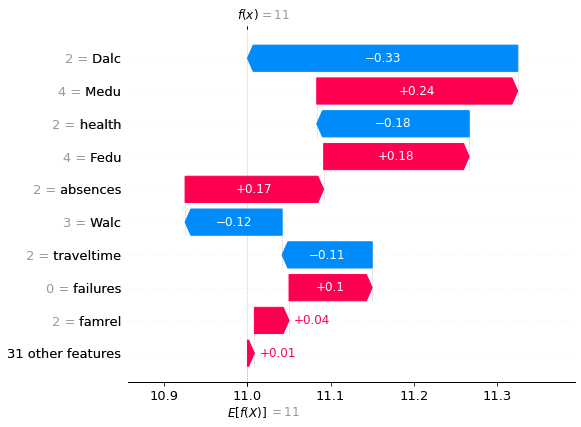

9


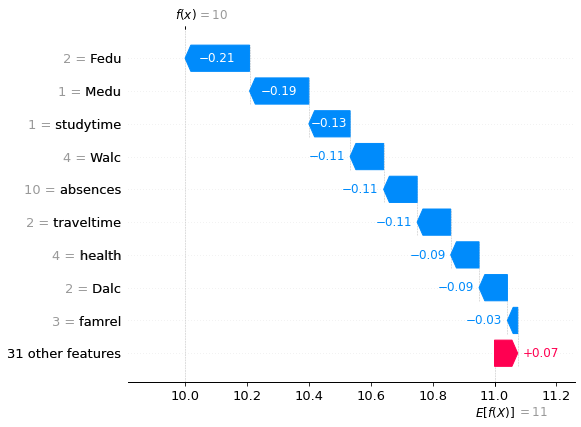

In [101]:
model = best_ckpts['EBM']
shap_explainer = shap.Explainer(model.predict, test_subset)
shap_values = shap_explainer(test_subset)

for i, v in enumerate(shap_values):
    print(i)
    shap.plots.waterfall(v)

explainable boosting machines:
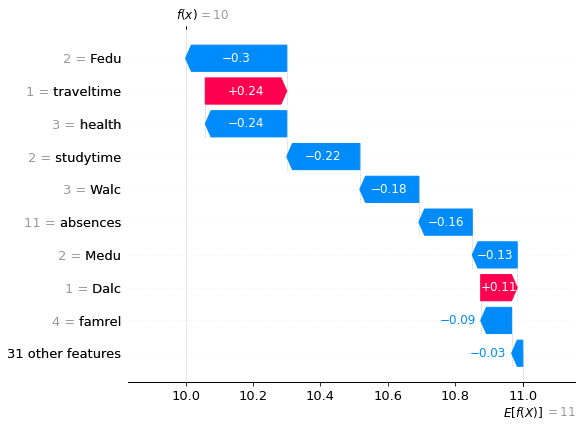

random forest:
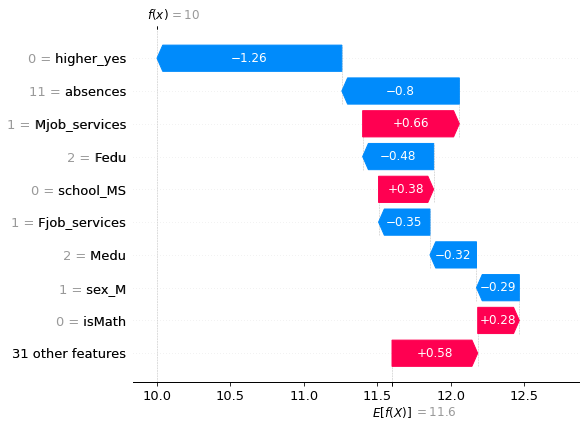

We see that scores for features are different on first example for explainable boosting machines and random forest. For instance absence in EBMs has a little negative score (-0.16) while for RF it is second most important feature for this prediction.

# Task B

Task B

V() = 0

V(A) - V() = 20

V(B, A) - V(B) = 40

V(C, A) - V(C) = 10

V(B, C, A) - V(B, C) = 30


Final answert: (2!* 20 + 1!*40 + 1!*10+2!*30)/3! = 25